<a href="https://colab.research.google.com/github/nurfnick/Metaheuristics/blob/main/Homework8/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#the intial framework for a particle swarm optimization for Schwefel minimization problem
#author: Charles Nicholson
#for ISE/DSA 5113


#need some python libraries
import copy
import math
from random import Random
import numpy as np


#to setup a random number generator, we will specify a "seed" value
seed = 12345
myPRNG = Random(seed)

#to get a random number between 0 and 1, write call this:             myPRNG.random()
#to get a random number between lwrBnd and upprBnd, write call this:  myPRNG.uniform(lwrBnd,upprBnd)
#to get a random integer between lwrBnd and upprBnd, write call this: myPRNG.randint(lwrBnd,upprBnd)

lowerBound = -500  #bounds for Schwefel Function search space
upperBound = 500   #bounds for Schwefel Function search space

#you may change anything below this line that you wish too -----------------------------------------------------

#note: for the more experienced Python programmers, you might want to consider taking a more object-oriented approach to the PSO implementation, i.e.: a particle class with methods to initialize itself, and update its own velocity and position; a swarm class with a method to iterates through all particles to call update functions, etc.

#number of dimensions of problem
dimensions = 2

#number of particles in swarm
swarmSize = 10

#max velocity component wise
maxVelocity = 10

w = 5 #intertial effect
phi1 = 3 # best effect on individuals
phi2 = 1 #global best effect

#Schwefel function to evaluate a real-valued solution x
# note: the feasible space is an n-dimensional hypercube centered at the origin with side length = 2 * 500

def evaluate(x):
      val = 0
      d = len(x)
      for i in range(d):
            val = val + x[i]*math.sin(math.sqrt(abs(x[i])))

      val = 418.9829*d - val

      return val



#the swarm will be represented as a list of positions, velocities, values, pbest, and pbest values

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

#note: pos[0] and vel[0] provides the position and velocity of particle 0; pos[1] and vel[1] provides the position and velocity of particle 1; and so on.


curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


#initialize the swarm randomly
for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value


pbestestVal = min(curValue)
pbestest = pbest[pbestVal.index(pbestestVal)]

#Currently missing several elements
#e.g., velocity update function; velocity max limitations; position updates; dealing with infeasible space; identifying the global best; main loop, stopping criterion, etc.

def velocityUpdate(): #update velocities
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #iterate through dimensions
      vel[i][j] = w*vel[i][j]+phi1*myPRNG.random()*(pbest[i][j]-pos[i][j])+phi2*myPRNG.random()*(pbestest[j]-pos[i][j]) #follow formula
      if vel[i][j] >maxVelocity: #check if outside of allowed values
        vel[i][j] = maxVelocity #just return max/min allowed
      if vel[i][j] <-1*maxVelocity:
        vel[i][j] = -1*maxVelocity




def positionUpdate():#must be called after velocity update
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #update all dimensions
      pos[i][j] = pos[i][j] + vel[i][j] #follow basic PSO

      if pos[i][j] > upperBound: #check if outside of feasible
        pos[i][j] = upperBound #if so, put on edge
      if pos[i][j] < lowerBound: #outside feasible?
        pos[i][j] = lowerBound
    curValue[i] = evaluate(pos[i]) #update currentvalue too


def pbestUpdate(): #update the best lists
  particleUpdate = 0 #how many particles have been updated?
  globalUpdate = 0 #did the global best update
  global pbestestVal, pbestest #get these variables from global environment not local
  for i in range(swarmSize): #iterate through swarm
    if curValue[i]< pbestVal[i]: #is the current better than current best
      pbest[i] = pos[i][:] #since yes, change it up
      pbestVal[i] = curValue[i]
      particleUpdate +=1 #increment the counter
      if curValue[i]<pbestestVal: #since this is better than before, check if it is the new best
        pbestestVal = curValue[i] #since it is, update
        pbestest = pos[i][:]
        globalUpdate +=1
  return particleUpdate, globalUpdate #return counts for stopping criteria

def summaryFitness(pop):
    a=np.array(pop)
    return np.min(a), np.mean(a), np.max(a), np.std(a)





In [2]:
#number of dimensions of problem
dimensions = 2

#number of particles in swarm
swarmSize = 5

#max velocity component wise
maxVelocity = 100

w = 1 #intertial effect
phi1 = 2 # best effect on individuals
phi2 =2 #global best effect

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value



pbestestVal = min(pbestVal)
pbestest = pbest[pbestVal.index(min(pbestVal))]

tableForGraphing = []
globalBest = []
tableForGraphing.append(copy.deepcopy(pos))
tableForGraphing.append(copy.deepcopy(vel))
globalBest.append(copy.deepcopy(pbestest))


for i in range(4):
  velocityUpdate()
  positionUpdate()
  pbestUpdate()
  tableForGraphing.append(copy.deepcopy(pos))
  tableForGraphing.append(copy.deepcopy(vel))
  globalBest.append(copy.deepcopy(pbestest))

  print("Iteration: ", i, summaryFitness(curValue))

Iteration:  0 (572.1182128981563, 710.6122321422916, 949.4176043499525, 153.66469185449031)
Iteration:  1 (573.0598935006549, 795.2540474057764, 1000.2054013806526, 137.54155197886485)
Iteration:  2 (496.88593062147766, 636.0019304589697, 783.7197336157752, 121.68398378544256)
Iteration:  3 (734.62984985852, 960.8349641121833, 1251.8665538925886, 222.08890271278094)


In [3]:
tableForGraphing = np.array(tableForGraphing)
tableForGraphing

array([[[ 2.09386437e+02,  3.07124533e+02],
        [ 3.73189967e+02,  3.01899238e+02],
        [-3.14171640e+02,  1.82393858e+01],
        [-4.58460778e+02,  4.83292653e+02],
        [-3.49727534e+02,  3.91382750e+01]],

       [[ 6.49667894e-01, -5.35383774e-01],
        [-5.67239139e-01,  1.10170598e-01],
        [ 1.77217237e-01,  9.17325007e-01],
        [-6.71723436e-01,  6.64409772e-01],
        [-5.41774059e-01, -6.86038339e-01]],

       [[ 1.58393150e+02,  2.61197928e+02],
        [ 2.73189967e+02,  2.01899238e+02],
        [-3.13994423e+02,  1.91567108e+01],
        [-3.58460778e+02,  3.83292653e+02],
        [-2.82533141e+02,  6.31574859e+00]],

       [[-5.09932873e+01, -4.59266052e+01],
        [-1.00000000e+02, -1.00000000e+02],
        [ 1.77217237e-01,  9.17325007e-01],
        [ 1.00000000e+02, -1.00000000e+02],
        [ 6.71943928e+01, -3.28225264e+01]],

       [[ 5.83931502e+01,  1.61197928e+02],
        [ 1.73189967e+02,  1.01899238e+02],
        [-3.13817206e+02

In [4]:
globalBest = np.array(globalBest)

globalBest

array([[-314.17164014,   18.23938575],
       [-313.99442291,   19.15671076],
       [-313.81720567,   20.07403577],
       [-332.81513524,  183.29265315],
       [-332.81513524,  183.29265315]])

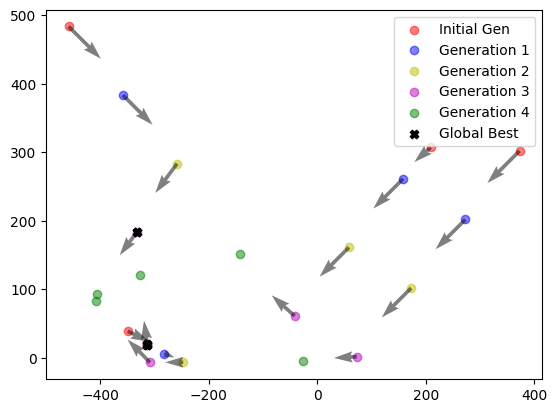

In [5]:
import matplotlib.pyplot as plt

plt.scatter(tableForGraphing[0,:,0],tableForGraphing[0,:,1],c = 'r',alpha = 0.5, label = "Initial Gen")
plt.scatter(tableForGraphing[2,:,0],tableForGraphing[2,:,1], c= 'b', alpha = 0.5, label = "Generation 1")
plt.scatter(tableForGraphing[4,:,0],tableForGraphing[4,:,1],c = 'y',alpha = 0.5, label = "Generation 2")
plt.scatter(tableForGraphing[6,:,0],tableForGraphing[6,:,1], c= 'm', alpha = 0.5, label = "Generation 3")
plt.scatter(tableForGraphing[8,:,0],tableForGraphing[8,:,1], c= 'g', alpha = 0.5, label = "Generation 4")
plt.scatter(globalBest[:,0],globalBest[:,1], c = 'k', alpha = 1, label = "Global Best", marker = 'X')
plt.quiver(tableForGraphing[0,:,0],tableForGraphing[0,:,1],tableForGraphing[3,:,0],tableForGraphing[3,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[2,:,0],tableForGraphing[2,:,1],tableForGraphing[5,:,0],tableForGraphing[5,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[4,:,0],tableForGraphing[4,:,1],tableForGraphing[7,:,0],tableForGraphing[7,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[6,:,0],tableForGraphing[6,:,1],tableForGraphing[9,:,0],tableForGraphing[9,:,1], alpha = 0.5)
plt.legend()

In [11]:
dimensions = 200

#number of particles in swarm
swarmSize = 100

#max velocity component wise
maxVelocity = 75

w = 0 #intertial effect
phi1 = 1.25 # best effect on individuals
phi2 = 2.75 #global best effect

#Schwefel function to evaluate a real-valued solution x
# note: the feasible space is an n-dimensional hypercube centered at the origin with side length = 2 * 500

def evaluate(x):
      val = 0
      d = len(x)
      for i in range(d):
            val = val + x[i]*math.sin(math.sqrt(abs(x[i])))

      val = 418.9829*d - val

      return val



#the swarm will be represented as a list of positions, velocities, values, pbest, and pbest values

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

#note: pos[0] and vel[0] provides the position and velocity of particle 0; pos[1] and vel[1] provides the position and velocity of particle 1; and so on.


curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


#initialize the swarm randomly
for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value


pbestestVal = min(curValue)
pbestest = pbest[pbestVal.index(pbestestVal)]

#Currently missing several elements
#e.g., velocity update function; velocity max limitations; position updates; dealing with infeasible space; identifying the global best; main loop, stopping criterion, etc.

def velocityUpdate(): #update velocities
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #iterate through dimensions
      vel[i][j] = w*vel[i][j]+phi1*myPRNG.random()*(pbest[i][j]-pos[i][j])+phi2*myPRNG.random()*(pbestest[j]-pos[i][j]) #follow formula
      if vel[i][j] >maxVelocity: #check if outside of allowed values
        vel[i][j] = maxVelocity #just return max/min allowed
      if vel[i][j] <-1*maxVelocity:
        vel[i][j] = -1*maxVelocity




def positionUpdate():#must be called after velocity update
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #update all dimensions
      pos[i][j] = pos[i][j] + vel[i][j] #follow basic PSO

      if pos[i][j] > upperBound: #check if outside of feasible
        pos[i][j] = upperBound #if so, put on edge
      if pos[i][j] < lowerBound: #outside feasible?
        pos[i][j] = lowerBound
    curValue[i] = evaluate(pos[i]) #update currentvalue too


def pbestUpdate(): #update the best lists
  particleUpdate = 0 #how many particles have been updated?
  globalUpdate = 0 #did the global best update
  global pbestestVal, pbestest #get these variables from global environment not local
  for i in range(swarmSize): #iterate through swarm
    if curValue[i]< pbestVal[i]: #is the current better than current best
      pbest[i] = pos[i][:] #since yes, change it up
      pbestVal[i] = curValue[i]
      particleUpdate +=1 #increment the counter
      if curValue[i]<pbestestVal: #since this is better than before, check if it is the new best
        pbestestVal = curValue[i] #since it is, update
        pbestest = pos[i][:]
        globalUpdate +=1
  return particleUpdate, globalUpdate #return counts for stopping criteria

def summaryFitness(pop):
    a=np.array(pop)
    return np.min(a), np.mean(a), np.max(a), np.std(a)


for i in range(1000):
  velocityUpdate()
  positionUpdate()
  pbestUpdate()

  minVal, meanVal, maxVal, stdVal=summaryFitness(pbestVal)          #check out the population at each generation
  print("Iteration: ", i, summaryFitness(curValue))

print(pbestestVal)
print(pbestest)

Iteration:  0 (76707.5436795088, 82982.99542929023, 89437.68142515367, 2594.348980890857)
Iteration:  1 (76212.53658310359, 82609.17478858042, 88279.99639339179, 2502.4026310696204)
Iteration:  2 (76212.53658310359, 82673.6279256004, 87343.1875244771, 2231.76843011435)
Iteration:  3 (76212.53658310359, 81887.42961528266, 86246.63376137464, 1839.2597970343888)
Iteration:  4 (75416.71003190089, 81716.17940345095, 87373.04221705237, 2233.255788779959)
Iteration:  5 (75416.71003190089, 81695.24178426467, 85773.79048145634, 2098.706288545968)
Iteration:  6 (75416.71003190089, 81127.58661076399, 85673.69909669206, 1986.9109869087654)
Iteration:  7 (75416.71003190089, 80658.09040456121, 85987.15223267699, 2136.7306201825354)
Iteration:  8 (74807.97406825548, 80362.73828119144, 86579.41995282448, 2521.1527755315883)
Iteration:  9 (74807.97406825548, 80200.26233636521, 85075.03757025496, 2639.4411706319534)
Iteration:  10 (74688.25478517491, 79670.25932360705, 86444.6717972515, 2954.55107171888

In [23]:
##Local Search

dimensions = 200

#number of particles in swarm
swarmSize = 100

#max velocity component wise
maxVelocity = 75

w = 0 #intertial effect
phi1 =1.25 # best effect on individuals
phi2 = 2.75 #local best effect


#the swarm will be represented as a list of positions, velocities, values, pbest, and pbest values

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

#note: pos[0] and vel[0] provides the position and velocity of particle 0; pos[1] and vel[1] provides the position and velocity of particle 1; and so on.


curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


#initialize the swarm randomly
for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value


pbestestVal = pbestVal[:]
pbestest = pbest[:]

#Currently missing several elements
#e.g., velocity update function; velocity max limitations; position updates; dealing with infeasible space; identifying the global best; main loop, stopping criterion, etc.

def velocityUpdate(): #update velocities
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #iterate through dimensions
      vel[i][j] = w*vel[i][j]+phi1*myPRNG.random()*(pbest[i][j]-pos[i][j])+phi2*myPRNG.random()*(pbestest[i][j]-pos[i][j]) #follow formula
      if vel[i][j] >maxVelocity: #check if outside of allowed values
        vel[i][j] = maxVelocity #just return max/min allowed
      if vel[i][j] <-1*maxVelocity:
        vel[i][j] = -1*maxVelocity




def positionUpdate():#must be called after velocity update
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #update all dimensions
      pos[i][j] = pos[i][j] + vel[i][j] #follow basic PSO

      if pos[i][j] > upperBound: #check if outside of feasible
        pos[i][j] = upperBound #if so, put on edge
      if pos[i][j] < lowerBound: #outside feasible?
        pos[i][j] = lowerBound
    curValue[i] = evaluate(pos[i]) #update currentvalue too


def pbestUpdateLocalStar(): #update the best lists
  particleUpdate = 0 #how many particles have been updated?
  globalUpdate = 0 #did the global best update
  global pbestestVal, pbestest #get these variables from global environment not local
  for i in range(swarmSize): #iterate through swarm
    if curValue[i]< pbestVal[i]: #is the current better than current best
      pbest[i] = pos[i][:] #since yes, change it up
      pbestVal[i] = curValue[i]
      particleUpdate +=1 #increment the counter
      if min(curValue[i],pbestestVal[0])<pbestestVal[i]: #since this is better than before, check if it is a new local best
        if curValue[i] < pbestestVal[i]:
          pbestestVal[i] = curValue[i] #since it is, update
          pbestest[i] = pos[i][:]
          globalUpdate +=1
        else:
          pbestestVal[i] = pbestestVal[0] #since it is, update
          pbestest[i] = pbestest[0][:]
          globalUpdate +=1

  return particleUpdate, globalUpdate #return counts for stopping criteria


for i in range(1000):
  velocityUpdate()
  positionUpdate()
  pbestUpdateLocalStar()

  minVal, meanVal, maxVal, stdVal=summaryFitness(pbestVal)          #check out the population at each generation
  print("Iteration: ", i, summaryFitness(curValue))

print(min(pbestestVal))
print(pbestest[pbestestVal.index(min(pbestestVal))])

Iteration:  0 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  1 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  2 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  3 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  4 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  5 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  6 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  7 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  8 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  9 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022)
Iteration:  10 (77421.16282655683, 83449.02631279881, 89246.78895307536, 2654.216747458022